##  Прогнозирование с помощью 
##  экспоненциального сглаживания и SARIMA

##  Получаем два прогноза, и это хорошо.

###  Но придется гадать, какой прогноз выбрать.
###  Кроме того, не можем оценить относительную ошибку прогноза
###  Проблемы решаются в следующем варианте скрипта

In [1]:
#  Дополнительное чтение
#  Описание процудуры, выполняющей экспоненциальное сглаживание
#  https://www.statsmodels.org/dev/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html
#  Самый популярный учебник по прогнозированию
#  https://otexts.org/fpp2/

In [2]:
#  Активируем библиотеки, необходимые для работы

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

from statsmodels.tsa.api import ExponentialSmoothing



###  Временной ряд: авиаперевозки (series G)
###  Предварительный анализ данных

In [3]:
#  Внимание!  Ячейку надо редактировать!


#  1  Задаем путь к рабочей папке
#  Найдите путь к папке, где лежит файл с данными
#  Внимание!  Придется переделать слеши, они не такие, как в Windows

#  2  Задаем имя файла, в котором содержится столбец с данными
#  Найдите имя файла с данными в папке, содержащей файл с данными

#  1  
path = "C:/aaa/R/_R_лекции/R_занятие_07_forecast/data/03_series_g/"

#  2  
file_name = 'series_g.csv'

In [4]:

os.chdir(path)

zzz = pd.read_csv(file_name, sep = ";")

In [5]:
#  Самопроверка. Все хорошо? Смотрим начало таблицы с данными. 
zzz.head()

,date,series_g
0,JAN 1949,112
1,FEB 1949,118
2,MAR 1949,132
3,APR 1949,129
4,MAY 1949,121


In [6]:
#  Самопроверка. Все хорошо? Смотрим конец таблицы с данными.
zzz.tail()

,date,series_g
139,AUG 1960,606
140,SEP 1960,508
141,OCT 1960,461
142,NOV 1960,390
143,DEC 1960,432


####  Определяем номер столбца с данными. <br>

Смотрим на предыдущие таблицы. <br>

Первый столбец не считаем, у него нет заголовка. (Это индекс, там имена/номера строк) <br>
Второй столбец содержит даты, он нам не нужен.  <br>
Но его номер 0, потому что в Питоне пересчет начинается с 0! <br>

Третий столбец содержит временной ряд, он нам и нужен. <br>
Но его номер 1, потому что при пересчете сразу после 0 идет 1  <br>

Итак, данные в третьем столбце таблицы, но это столец номер 1  <br>

In [7]:
#  Внимание!  Ячейку надо редактировать!


#  Указываем номер столбца с данными

column_num = 1

In [8]:
zzz_1 = zzz[ zzz.columns[column_num] ]

#  zzz_1

Построим графики объёма пассажироперевозок и определим, 
- тип тренда (линейный или нет) и 
- тип сезонности ( аддитивный или мультипликативный). 


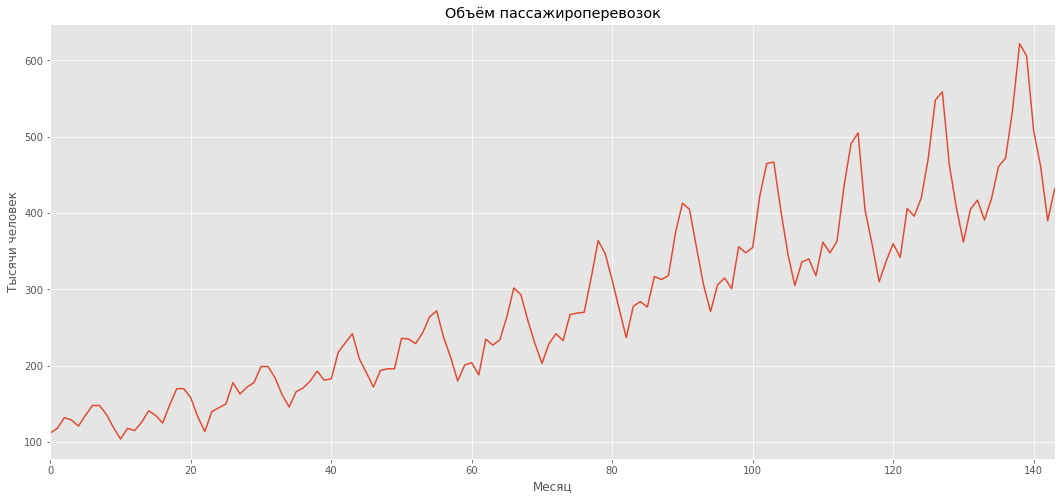

In [9]:
#  Внимание!  Ячейку можно редактировать!
#  Можно изменить размер картинки, подписи осей и заголовок
#  А можно не редактировать, если все устраивает...

#  Указываем размер картинки
plt.figure(figsize=(18, 8))

zzz_1.plot()

plt.xlabel(u'Месяц')
plt.ylabel(u'Тысячи человек')
plt.title(u'Объём пассажироперевозок')


plt.show()

Следующую ячейку обсуждаем, если останется время <br>
В ней на график добавляются даты

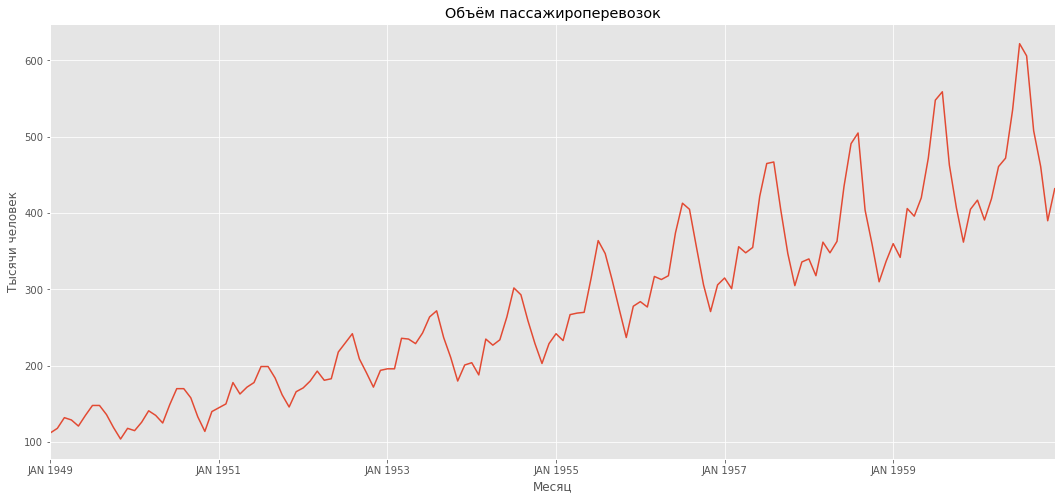

In [10]:
#  Внимание!  Ячейку можно редактировать!


#  В каком столбце брать даты?
zzz_2 = zzz[ zzz.columns[0] ]

#  В каких позициях на оси размещать даты? 
y_pos = np.arange(0, 144, 24)



plt.figure(figsize=(18, 8))

zzz_1.plot()

plt.xlabel(u'Месяц')
plt.ylabel(u'Тысячи человек')
plt.title(u'Объём пассажироперевозок')

# Добавляем даты на график
plt.xticks(y_pos, zzz_2[y_pos])

plt.show()

#### Задаем себе 5 вопросов <br>

1.  Есть ли у временного ряда тренд?<br>
1.1  Если есть, то какой (линия, парабола, кубическая парабола)?<br>

2.  Есть ли у временного ряда сезонность? <br> 
2.1  Если есть, то какая (аддитивная, мультипликативная)?<br>

3.  Меняет ли ряд свой характер?

4.  Есть ли у ряда выбросы?

5.  Есть ли у ряда пропуски?

#### Ответим себе на 5 вопросов <br>

1.  У временного ряда линейный тренд. <br>

2.  У временного ряда мультипликативная сезонность. <br>

3.  Ряд не меняет свой характер. <br>

4.  У ряда нет выбросов. <br>

5.  У ряда нет пропусков. <br>


####  Замечание для знатоков

Перед применением экспоненциального сглаживания логарифмировать не надо!  <br>
Процедура справится с любым вариантом сезонности, надо только правильно задать значения параметров.   <br>
В ARIMA иначе.


###  Приступаем к прогнозированию


In [20]:
#  Внимание!  Ячейку надо редактировать!


#  На сколько месяцев желаем прогнозировать?
horizon_ = 12


#  Какой тип сезонности?

season_type = 'multiplicative'
#  season_type = 'additive'


#  Какой период сезонных отклонений?

seas_period_ = 12
#  freq_ = 4
#  freq_ = 7
#  freq_ = 24


###  Прогноз с помощью экспоненциального сглаживания

###  Exponential Smoothing      Holt-Winters

In [21]:

#  Всегда trend='additive' по рекомендации Hyndman'а
#  Всегда damped = True

#  y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(zzz_1 ,seasonal_periods=seas_period_ ,
                            trend='additive', seasonal=season_type, damped = True).fit()



In [22]:
#  Сколько наблюдений имеется?
len(zzz_1)

144

In [23]:
#  Считаем подгонку и прогноз
fitted_ = fit1.predict(0, len(zzz_1) + horizon_ - 1)

In [24]:
#  Смотрим на полученные результаты
#  Все нормально?
fitted_

0      111.422940
1      120.064914
2      134.830300
3      130.594509
4      124.088710
          ...    
151    654.908594
152    546.764894
153    488.450763
154    415.727690
155    460.383694
Length: 156, dtype: float64

In [25]:
#  Все хорошо?
#  Сколько наблюдений в подгонке и прогнозе?
len(fitted_)

156

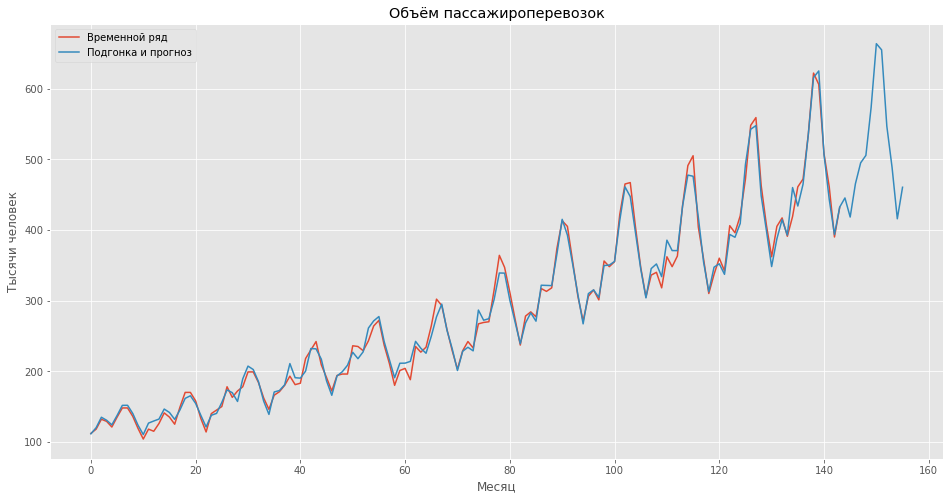

In [26]:
#  Внимание!  Ячейку можно редактировать!

plt.figure(figsize=(16,8))
plt.plot(zzz_1, label='Временной ряд')
plt.plot(fitted_, label='Подгонка и прогноз')
plt.legend(loc='best')

plt.xlabel(u'Месяц')
plt.ylabel(u'Тысячи человек')
plt.title(u'Объём пассажироперевозок')

plt.show()

Выводим результаты <br>
Спрогнозированные значения <br>
Копируйте и вставляйте в отчет, презентацию...

In [27]:
fitted_.iloc[len(zzz_1) : len(fitted_)]

144    445.243904
145    418.227025
146    465.312110
147    494.952788
148    505.478519
149    573.316201
150    663.600441
151    654.908594
152    546.764894
153    488.450763
154    415.727690
155    460.383694
dtype: float64

###  Прогнозирование с помощью  Seasonal ARIMA


In [28]:
#  Активируем библиотеку, которую будем использовать
import pmdarima as pm

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\USER\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [29]:
#  Какой период сезонных отклонений?
#  Копия, приведена здесь только для напоминания
#  Используется в процедуре в следующей ячейке

seas_period_ = 12
#  freq_ = 4
#  freq_ = 7
#  freq_ = 24


#  На сколько месяцев желаем прогнозировать?
#  Копия, приведена здесь только для напоминания
horizon_ = 12


In [30]:

#  Какой тип сезонности?

#  1
#  Если аддитивная, НЕ логарифмируем, все хорошо и так.

#  2
#  Если сезонность мультипликативная, надо переходить к логарифмам.
#  Получить прогноз для логарифмов, затем вернуться к исходным значениям.

#  1
#  zzz_2 = zzz[ zzz.columns[column_num] ]

#  2
zzz_2 = np.log10(zzz[ zzz.columns[column_num] ])



In [31]:
zzz_2.head(5)

0    2.049218
1    2.071882
2    2.120574
3    2.110590
4    2.082785
Name: series_g, dtype: float64

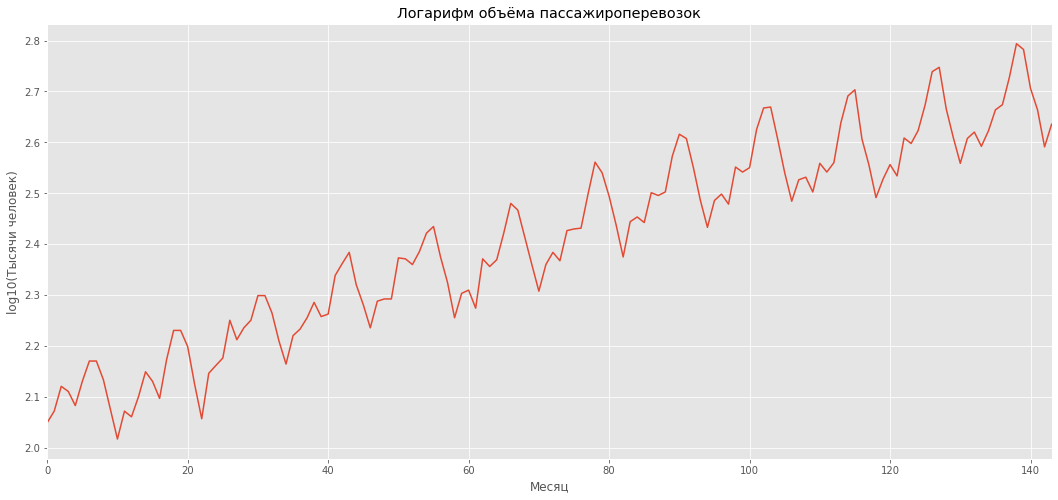

In [32]:
#  Внимание!  Ячейку можно редактировать!
#  Можно изменить размер картинки, подписи осей и заголовок
#  А можно не редактировать...

#  Указываем размер картинки
plt.figure(figsize=(18, 8))

zzz_2.plot()

plt.xlabel(u'Месяц')
plt.ylabel(u'log10(Тысячи человек)')
plt.title(u'Логарифм объёма пассажироперевозок')


plt.show()

In [35]:
#   Задаем параметры процедуры SARIMA

model_2 = pm.auto_arima(zzz_2, exogenous=None, 
                         start_p=2, d=None, start_q=2, 
                         max_p=2, max_d=2, max_q=2, 
                         start_P=1, D=None, start_Q=1, 
                         max_P=2, max_D=2, max_Q=2, max_order=8, 
                         m = seas_period_,                       #  период сезонн откл
                         seasonal=True, 
                         stationary=False, 
                         information_criterion='aic', 
                         alpha=0.05, 
                         test='kpss', seasonal_test='ch', 
                         stepwise=True, n_jobs=1, start_params=None, 
                         trend='c', method=None, transparams=True, 
                         solver='lbfgs', maxiter=50, 
                         disp=0, callback=None, offset_test_args=None, 
                         seasonal_test_args=None, suppress_warnings=False, 
                         error_action='warn', trace=False, random=False, 
                         random_state=None, n_fits=10, return_valid_fits=False, 
                         out_of_sample_size=0, scoring='mse', scoring_args=None)

C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\USER\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge

In [37]:
#   Основные характеристики модели
#   Анализируются специалистом

model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 374.117
Date:                            Mon, 15 Mar 2021   AIC                           -734.233
Time:                                    13:38:50   BIC                           -713.493
Sample:                                         0   HQIC                          -725.806
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.053e-05   6.15e-05      0.496      0.620      -9e-05       0.000
ar.L1          0.3754      0.238      1.575      0.115      -0.092       0.843
ar.L2          0.0808      0.134      0.602      0.547      -0.182       0.344
ma.L1         -0.7347      0.230     -3.191      0.001      -1.186      -0.284
ar.S.L12       0.9832      0.012     81.407      0.000       0.960       1.007
ma.S.L12      -0.5215      0.119     -4.381      0.000      -0.755      -0.288
sigma2         0.0003   3.11e-05      8.284      0.000       0.000       0.000
===================================================================================
Ljung-Box (Q):                       39.84   Jarque-Bera (JB):                 2.22
Prob(Q):                              0.48   Prob(JB):                         0.33
Heteroskedasticity (H):               0.61   Skew:                             0.06
Prob(H) (two-sided):                  0.09   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###   Комментарий для знатоков

Аналитик может лучше <br>
Классическая модель для этого ряда SARIMAX(0, 1, 1)x(0, 1, 1, 12)



In [38]:
model_2.fit(zzz_2)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(2, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args={},
      seasonal_order=(1, 0, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=False, transparams=True, trend='c',
      with_intercept=True)

In [39]:
#   Значения прогноза для логарифмов 

forecast_2 = model_2.predict(n_periods=horizon_)
forecast_2

array([2.65324517, 2.6302326 , 2.67914712, 2.69287829, 2.70723254,
       2.76404912, 2.82289144, 2.82087693, 2.74582926, 2.69802922,
       2.63668737, 2.68042009])

Ниже ответ по методу SARIMA <br>
Спрогнозированные значения  для исходного ряда <br>
Копируйте и вставляйте в отчет, презентацию...



In [40]:

10**forecast_2

array([450.03383901, 426.80804552, 477.69107143, 493.03561163,
       509.60366633, 580.83010373, 665.10688227, 662.02886437,
       556.96673733, 498.91805093, 433.19892951, 479.09329082])

###  Визуализация прогноза

In [41]:
#   Номера месяцев, для которых делается прогноз

#   valid = range(145, 157, 1) 

valid = range(len(zzz_1)+1, len(zzz_1)+horizon_+1, 1) 



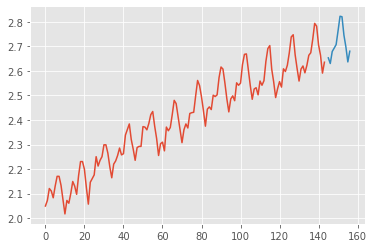

In [42]:
#   Проверяем качество прогноза для логарифмов
#   Строим графики

forecast_3 = pd.DataFrame(forecast_2, index = valid, columns=['Prediction'])

#  график ряда логарифмов
plt.plot(zzz_2, label='Train')
#  график прогноза для логарифмов
plt.plot(forecast_3, label='Prediction')
plt.show()

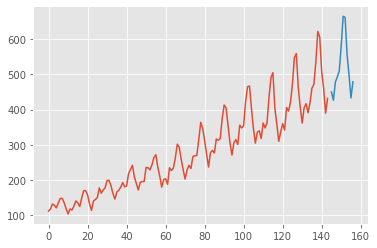

In [43]:
#  По прогнозу для логарифмов вычисляем прогноз для исходного ряда

#   Проверяем качество прогноза для исходного ряда
#   Строим графики

#  график исходного ряда
plt.plot(10**zzz_2, label='Train')
#  график прогноза
plt.plot(10**forecast_3, label='Prediction')
plt.show()

